In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Carregamento dos Dados

In [ ]:
# Carregar os datasets

df_clientes = pd.read_csv("clientes.csv")
df_produtos = pd.read_csv("ecommerce_produtos.csv")
df_vendas = pd.read_csv("vendas.csv")
df_estados = pd.read_csv("estado_regiao_att.csv")

In [ ]:
print (df_clientes)

     ID_Cliente              Nome_Cliente  ID_Estado        Canal
0             1  Sr. Enzo Gabriel Azevedo         22  Loja Física
1             2    Srta. Kamilly da Rocha          4       Online
2             3             Amanda Farias         10       Online
3             4              André Castro         12       Online
4             5          Dr. Pietro Nunes          8  Loja Física
..          ...                       ...        ...          ...
495         496            Amanda da Mata          1  Loja Física
496         497           Isabella da Luz         24  Loja Física
497         498     Vitor Gabriel Pereira         18  Loja Física
498         499            Mariana da Paz         14       Online
499         500         Francisco Correia         24  Loja Física

[500 rows x 4 columns]


In [ ]:
print (df_produtos)

      Categoria                 Nome_Produto        SKU    Preco
0   Eletrônicos                   Smartphone  SKU-72688  2718.36
1   Eletrônicos                       Laptop  SKU-50582  4526.60
2   Eletrônicos     Fone de Ouvido Bluetooth  SKU-54960   128.90
3   Eletrônicos                       TV LED  SKU-42823  4350.20
4   Eletrônicos                       Tablet  SKU-49210   715.28
5   Eletrônicos                   Smartwatch  SKU-86759   185.34
6   Eletrônicos               Câmera Digital  SKU-10889  5602.01
7   Eletrônicos       Alto-falante Bluetooth  SKU-92162  1198.31
8   Eletrônicos          Carregador Portátil  SKU-37178    53.67
9   Eletrônicos               Roteador Wi-Fi  SKU-20568   491.41
10       Roupas           Camiseta Masculina  SKU-68595    47.57
11       Roupas             Vestido Feminino  SKU-99850   354.77
12       Roupas                  Calça Jeans  SKU-28878   123.17
13       Roupas             Jaqueta de Couro  SKU-36297  1959.53
14       Roupas          

In [ ]:
print (df_vendas)

     ID_Venda        Data  ID_Cliente SKU_Produto  Quantidade
0           1  2023-08-07         284   SKU-73390           5
1           2  2023-04-01         285   SKU-72688           5
2           3  2023-12-05         265   SKU-56131           9
3           4  2023-05-06          81   SKU-26460           5
4           5  2023-08-03         194   SKU-22668          10
..        ...         ...         ...         ...         ...
995       996  2023-07-11         163   SKU-94109           1
996       997  2023-06-23         446   SKU-28878           2
997       998  2023-12-24         253   SKU-59806           5
998       999  2023-06-24         446   SKU-59806           3
999      1000  2023-03-27         266   SKU-54960           8

[1000 rows x 5 columns]


In [ ]:
print (df_estados)

    id_estado sigla               estado        regiao    pais
0           1    AC                 Acre         Norte  Brasil
1           2    AL              Alagoas      Nordeste  Brasil
2           3    AP                Amapá         Norte  Brasil
3           4    AM             Amazonas         Norte  Brasil
4           5    BA                Bahia      Nordeste  Brasil
5           6    CE                 Cerá      nordeste  Brasil
6           7    DF     Distrito Federal  Centro-Oeste  Brasil
7           8    ES       Espiríto Santo       Sudeste  Brasil
8           9    GO                Goiás  Centro-Oeste  Brasil
9          10    MA             Maranhão      Nordeste  Brasil
10         11    MT          Mato Grosso  Centro-Oeste  Brasil
11         12    MS   Mato Grosso do Sul  Centro-Oeste  Brasil
12         13    MG         Minas Gerais       Sudeste  Brasil
13         14    PA                 Pará         Norte  Brasil
14         15    PB              Paraíba      Nordeste 

In [ ]:
# Criando um novo DataFrame combinando os dados relevantes

df_final = df_vendas.merge(df_clientes, on="ID_Cliente", how="inner")\
                    .merge(df_produtos, left_on="SKU_Produto", right_on="SKU", how="inner")\
                    .merge(df_estados, left_on="ID_Estado", right_on="id_estado", how="inner")

# Criar coluna de valor total da venda

df_final["Valor_Venda"] = df_final["Quantidade"] * df_final["Preco"]

# Exibir as primeiras linhas do novo DataFrame

print(df_final.head())

   ID_Venda        Data  ID_Cliente SKU_Produto  Quantidade  \
0         1  2023-08-07         284   SKU-73390           5   
1         2  2023-04-01         285   SKU-72688           5   
2         3  2023-12-05         265   SKU-56131           9   
3         4  2023-05-06          81   SKU-26460           5   
4         5  2023-08-03         194   SKU-22668          10   

              Nome_Cliente  ID_Estado        Canal    Categoria  \
0          Gabriela Farias          3       Online         Casa   
1        Lorenzo das Neves         17  Loja Física  Eletrônicos   
2          Mariana Peixoto         15       Online       Roupas   
3    Sra. Carolina Azevedo          5       Online         Casa   
4  Luiz Henrique Gonçalves         22  Loja Física   Brinquedos   

                  Nome_Produto        SKU    Preco  id_estado sigla  \
0            Luminária de Mesa  SKU-73390    35.83          3    AP   
1                   Smartphone  SKU-72688  2718.36         17    PE   
2    

### 2. Análise dos Dados

Distribuição dos clientes por canal de vendas:
Canal
Online         542
Loja Física    458
Name: count, dtype: int64


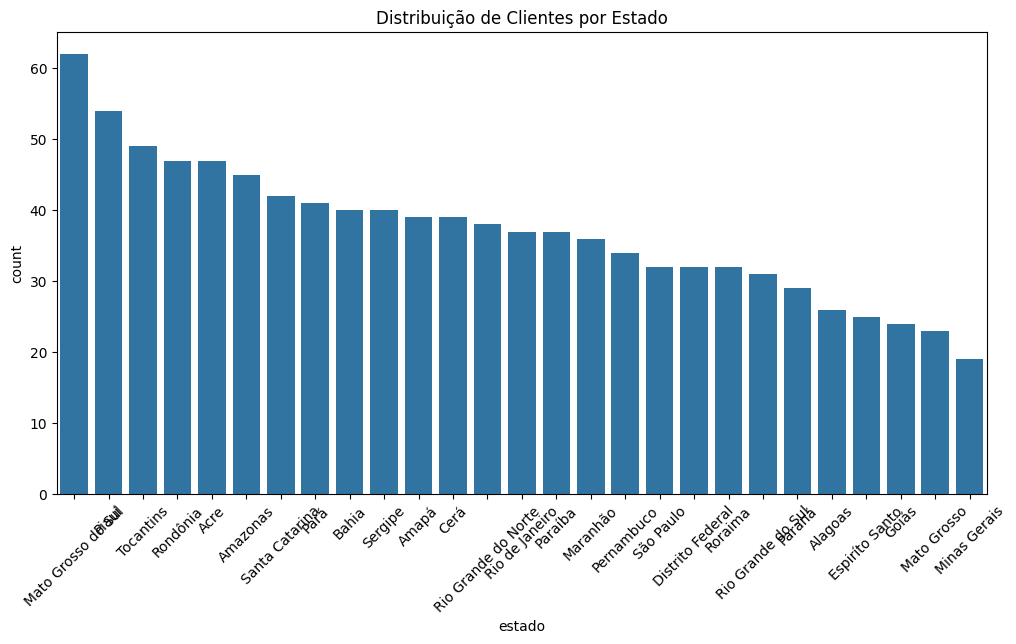

In [ ]:
# 1. Análise do Perfil do Cliente
# Análise descritiva do perfil dos clientes

print("Distribuição dos clientes por canal de vendas:")
print(df_final["Canal"].value_counts())

# Gráfico de distribuição dos clientes por estado

plt.figure(figsize=(12, 6))
sns.countplot(x=df_final["estado"], order=df_final["estado"].value_counts().index)
plt.title("Distribuição de Clientes por Estado")
plt.xticks(rotation=45)
plt.show()

Top 10 Produtos mais Vendidos:
Nome_Produto
Carregador Portátil        183
Alto-falante Bluetooth     171
Quebra-cabeça              170
Kit de Cozinha Infantil    159
Conjunto de Talheres       155
Laptop                     154
Kit de Desenho             143
Blocos de Montar           136
Almofada Decorativa        134
Camisa Social              130
Name: Quantidade, dtype: int64


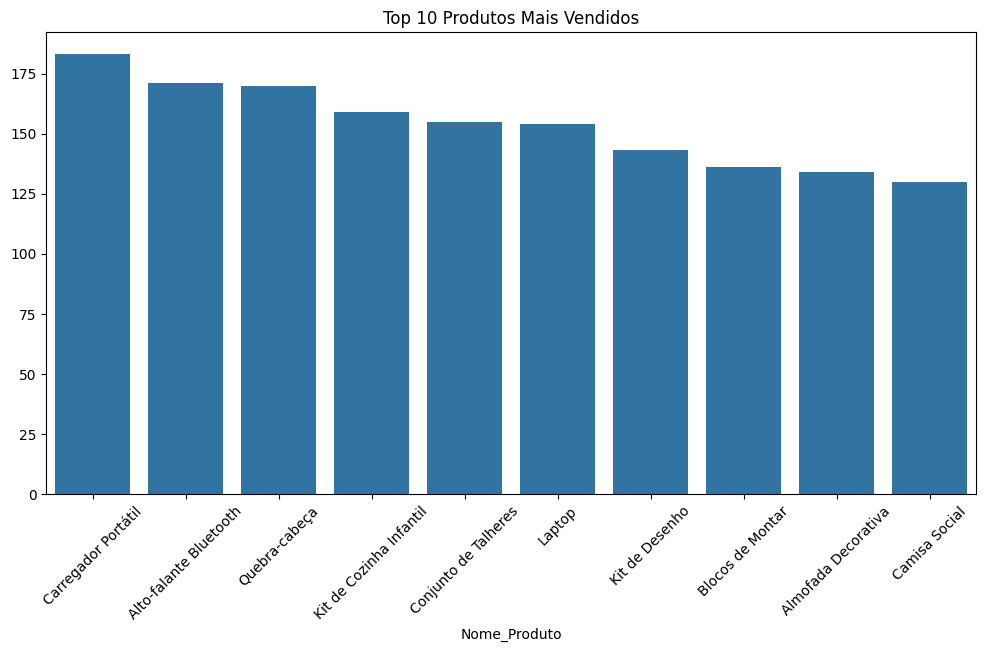

In [ ]:
# Produtos mais vendidos

produtos_mais_vendidos = df_final.groupby("Nome_Produto")["Quantidade"].sum().sort_values(ascending=False).head(10)
print("Top 10 Produtos mais Vendidos:")
print(produtos_mais_vendidos)

# Gráfico de produtos mais vendidos

plt.figure(figsize=(12, 6))
sns.barplot(x=produtos_mais_vendidos.index, y=produtos_mais_vendidos.values)
plt.title("Top 10 Produtos Mais Vendidos")
plt.xticks(rotation=45)
plt.show()

Vendas por Canal:
Canal
Online         1856612.32
Loja Física    1728144.21
Name: Valor_Venda, dtype: float64


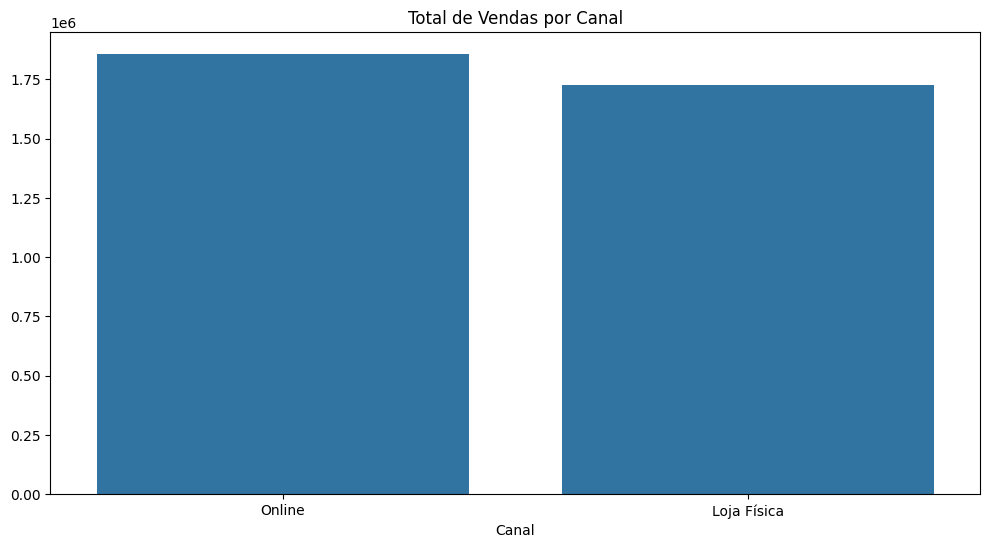

Vendas por Região:
regiao
Nordeste        1146658.51
Norte           1013722.01
Sul              454969.90
Centro-Oeste     453882.68
Sudeste          343627.93
nordeste         171895.50
Name: Valor_Venda, dtype: float64


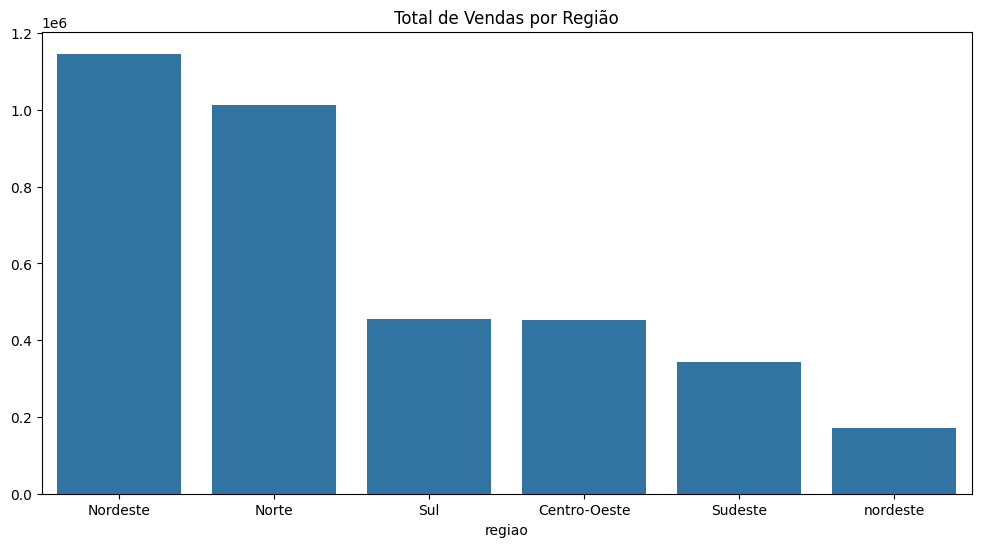

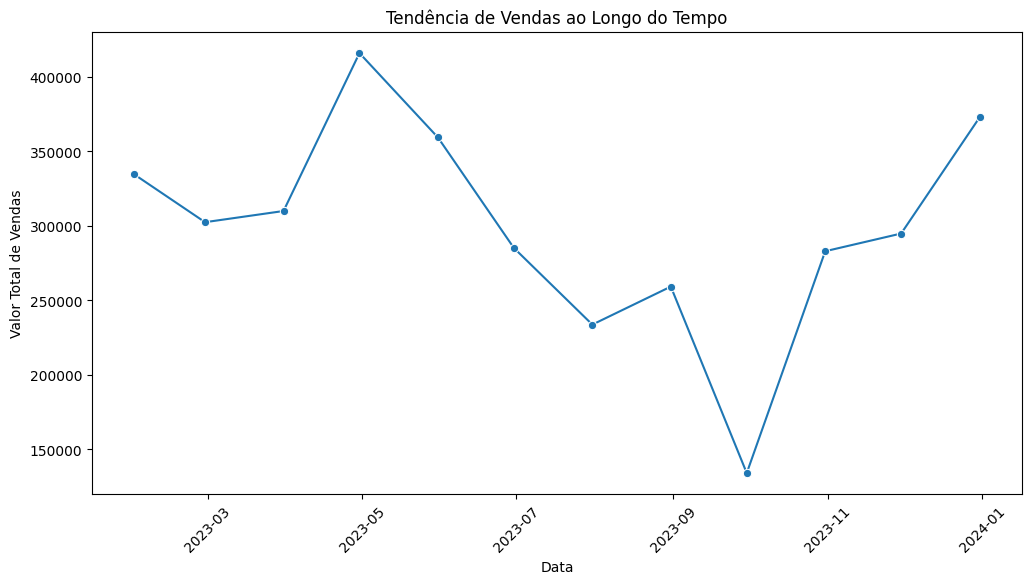

In [ ]:
# Vendas por canal
vendas_por_canal = df_final.groupby("Canal")["Valor_Venda"].sum().sort_values(ascending=False)
print("Vendas por Canal:")
print(vendas_por_canal)

# Gráfico de vendas por canal
plt.figure(figsize=(12, 6))
sns.barplot(x=vendas_por_canal.index, y=vendas_por_canal.values)
plt.title("Total de Vendas por Canal")
plt.show()

# Vendas por região
vendas_por_regiao = df_final.groupby("regiao")["Valor_Venda"].sum().sort_values(ascending=False)
print("Vendas por Região:")
print(vendas_por_regiao)

# Gráfico de vendas por região
plt.figure(figsize=(12, 6))
sns.barplot(x=vendas_por_regiao.index, y=vendas_por_regiao.values)
plt.title("Total de Vendas por Região")
plt.show()

# Tendência de vendas ao longo do tempo
df_final["Data"] = pd.to_datetime(df_final["Data"])
vendas_por_mes = df_final.resample("ME", on="Data")["Valor_Venda"].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=vendas_por_mes.index, y=vendas_por_mes.values, marker="o")
plt.title("Tendência de Vendas ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Valor Total de Vendas")
plt.xticks(rotation=45)
plt.show()

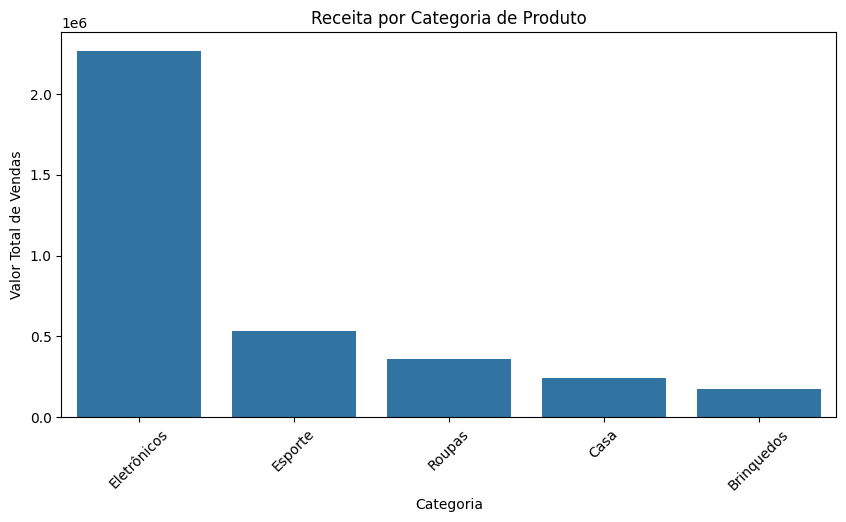

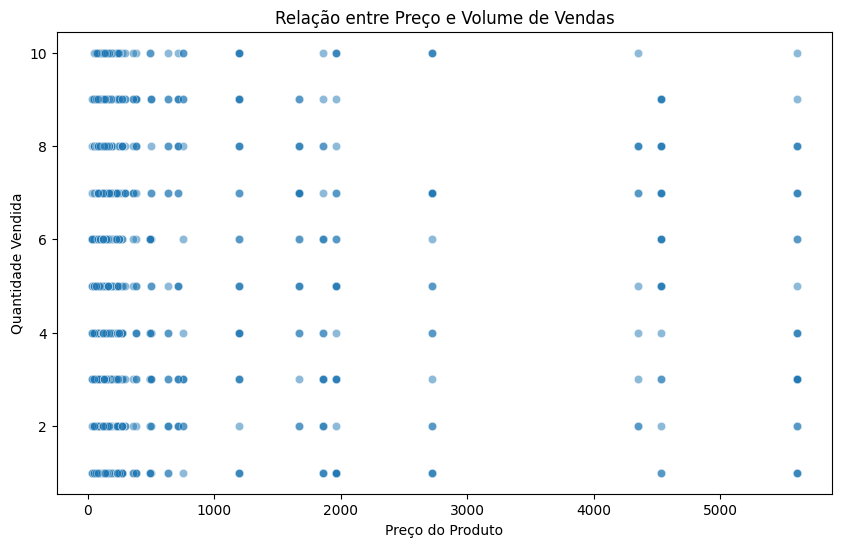

<ipython-input-115-0e4a88dfd4e6>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendas_por_faixa = df_final.groupby(faixa_preco)["Quantidade"].sum()


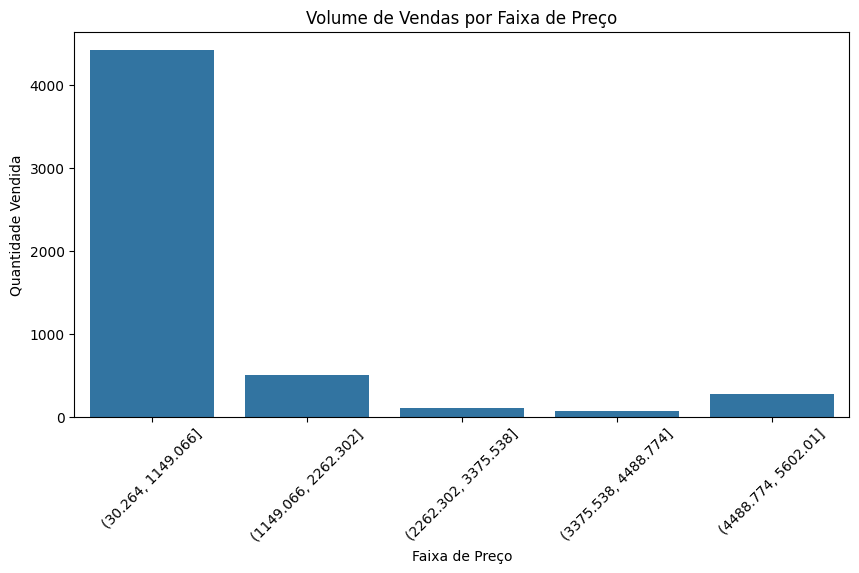

In [ ]:
# 3. Análise de Produtos
vendas_por_categoria = df_final.groupby("Categoria")["Valor_Venda"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values)
plt.title("Receita por Categoria de Produto")
plt.xlabel("Categoria")
plt.ylabel("Valor Total de Vendas")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_final["Preco"], y=df_final["Quantidade"], alpha=0.5)
plt.title("Relação entre Preço e Volume de Vendas")
plt.xlabel("Preço do Produto")
plt.ylabel("Quantidade Vendida")
plt.show()

faixa_preco = pd.cut(df_final["Preco"], bins=5)
vendas_por_faixa = df_final.groupby(faixa_preco)["Quantidade"].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=vendas_por_faixa.index.astype(str), y=vendas_por_faixa.values)
plt.title("Volume de Vendas por Faixa de Preço")
plt.xlabel("Faixa de Preço")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.show()